In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib.numpy_pickle as joblib
import torch
import torch.nn as nn
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import autoencoder_functions
import seperate_spec_and_features

True
Using device: cuda


In [2]:
#insert path to folder with trained model and parameters
path_to_model = 'final_models/Shank3_8_v0'

In [3]:
#open parameters file
parameters = joblib.load(path_to_model + '/parameters.pkl')
print('Parameters loaded from:', path_to_model + '/parameters.pkl')
print('Parameters:', parameters)
spectograms_file = parameters['spectograms_file']
labels_file = parameters['labels_file']
batch_size = parameters['batch_size']
model_choice = parameters['model_choice']
name = parameters['name']
latent_space_size = parameters['latent_space_size']
nr_epochs = parameters['nr_epochs']
amount_of_patience = parameters['amount_of_patience']
slope_leaky = parameters['slope_leaky']
oversampling = parameters['oversampling']
learning_rate = parameters['learning_rate']
precision_model = parameters['precision_model']
max_value_per_spec = parameters['max_value_per_spec']
removale_of_female = parameters['removale_of_female']
print('spectograms_file:', spectograms_file)
print('labels_file:', labels_file)
print('batch_size:', batch_size)
print('model_choice:', model_choice)
print('name:', name)
print('latent_space_size:', latent_space_size)
print('nr_epochs:', nr_epochs)
print('amount_of_patience:', amount_of_patience)
print('slope_leaky:', slope_leaky)
print('oversampling:', oversampling)
print('learning_rate:', learning_rate)
print('precision_model:', precision_model)
print('max_value_per_spec:', max_value_per_spec)
print('removale_of_female:', removale_of_female)

if oversampling == 'oversample':
    method_is_oversample_bool = True
else:
    method_is_oversample_bool = False

print('method_is_oversample_bool:', method_is_oversample_bool)

if max_value_per_spec.lower() == 'true':
    max_value_per_spec_bool = True
else:
    max_value_per_spec_bool = False

print('max_value_per_spec_bool:', max_value_per_spec_bool)

if removale_of_female.lower() == 'true':
    removal_of_female_bool = True
else:
    removal_of_female_bool = False

print('removal_of_female_bool:', removal_of_female_bool)




Parameters loaded from: final_models/Shank3_8_v0/parameters.pkl
Parameters: {'spectograms_file': 'shank3USVs_many_properties.jl', 'labels_file': WindowsPath('final_models/shank3_8_v0/labels.pkl'), 'batch_size': 64, 'model_choice': 'KL_leaky', 'name': WindowsPath('final_models/shank3_8_v0'), 'latent_space_size': 8, 'nr_epochs': 1000, 'amount_of_patience': 25, 'slope_leaky': 0.1, 'oversampling': 'normal', 'learning_rate': 0.001, 'precision_model': 10.0, 'max_value_per_spec': 'true', 'removale_of_female': 'true'}
spectograms_file: shank3USVs_many_properties.jl
labels_file: final_models\shank3_8_v0\labels.pkl
batch_size: 64
model_choice: KL_leaky
name: final_models\shank3_8_v0
latent_space_size: 8
nr_epochs: 1000
amount_of_patience: 25
slope_leaky: 0.1
oversampling: normal
learning_rate: 0.001
precision_model: 10.0
max_value_per_spec: true
removale_of_female: true
method_is_oversample_bool: False
max_value_per_spec_bool: True
removal_of_female_bool: True


In [4]:
spec_indices_test = torch.load(path_to_model + '/spec_indices_test')

C:\Users\ruben\AppData\Local\Temp\ipykernel_10732\1367124694.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_test = torch.load(path_to_model + '/spec_indice

In [5]:
#initialize the model
VAE_model = autoencoder_functions.VAE_KL_leaky(z_dim = latent_space_size, device_name='cuda',slope=slope_leaky,lr = learning_rate, model_precision =precision_model)
VAE_model = VAE_model.to(device)
#check if the model is on cuda
print(f"Model's first parameter is on device: {next(VAE_model.parameters()).device}")
VAE_model.load_state_dict(torch.load(path_to_model + '/model.pt'))

c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###


Model's first parameter is on device: cuda:0


C:\Users\ruben\AppData\Local\Temp\ipykernel_10732\3501565347.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  VAE_model.load_state_dict(torch.load(path_to_model + '/model

<All keys matched successfully>

In [6]:
usvs = joblib.load(spectograms_file)

In [7]:
spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path = seperate_spec_and_features.separate_spec_and_features(usvs)


In [8]:
# print(len(spec))
# spec_indices_test = np.arange(0,len(spec))
# print(len(spec_indices_test))
# #if spec[i] is longer than 160 remove it in spec_indices_test
# spec_indices_test = [i for i in spec_indices_test if spec[i].shape[1] <= 160]
# print(len(spec_indices_test))

In [9]:
# autoencoder_results_v2.compare_hardcoded_features_vs_latent_features(VAE_model, spec, spec_indices_test)

Latent shape:  (6687, 8)
Features shape:  (6687, 15)


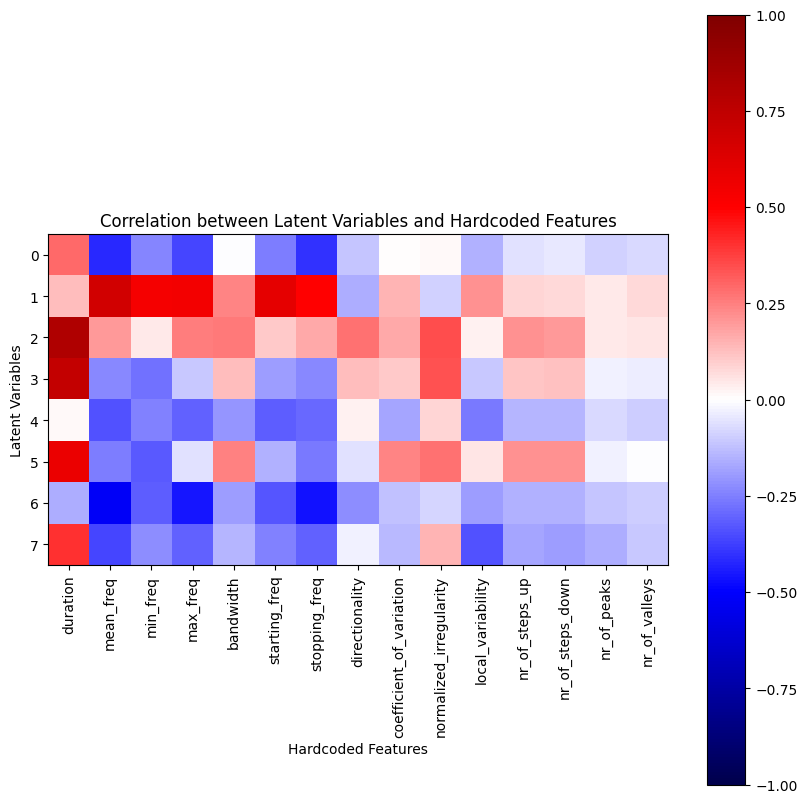

In [10]:
model = VAE_model
import features_single
from scipy.stats import spearmanr

test_specs = []

for i in spec_indices_test:
    test_specs.append(spec[i])

#create padding for the spectograms
padding_length = 160
test_padded_specs = np.zeros((len(test_specs), np.size(test_specs[0], 0), padding_length), dtype=np.float32)
for i in range(len(test_specs)):
    current_length = np.size(test_specs[i],1)
    zero_padding_length = padding_length - current_length

    zero_padded_spec = np.zeros((np.size(test_specs[i],0), padding_length))
    start_index = int((padding_length - current_length) // 2)
    zero_padded_spec[:, start_index:start_index+current_length] = test_specs[i]
    test_padded_specs[i] = zero_padded_spec

#delete spec, train_specs, test_specs from memory
del test_specs

#normalize the spectograms
test_padded_specs = np.log(test_padded_specs + 1e-10)  # Adding a small value to avoid log(0)
for i in range(test_padded_specs.shape[0]):
    test_padded_specs[i] = test_padded_specs[i] / np.max(test_padded_specs[i])

#convert to torch tensors
latent_test_loader = torch.utils.data.DataLoader(test_padded_specs, batch_size=1, shuffle=False)

#delete the padded spectograms from memory
del test_padded_specs

test_latent = model.get_latent(latent_test_loader)
print("Latent shape: ", test_latent.shape)

#get the hardcoded features of the test set
features =[]

for i in spec_indices_test:
    usv_features = features_single.get_usv_features(spec[i])
    features.append(usv_features.get())
features = np.array(features).squeeze()
print("Features shape: ", features.shape)
del spec

hardcoded_feature1 = 'duration'
hardcoded_feature2 = 'mean_freq'
hardcoded_feature3 = 'min_freq'
hardcoded_feature4 = 'max_freq'
hardcoded_feature5 = 'bandwidth'
hardcoded_feature6 = 'starting_freq'
hardcoded_feature7 = 'stopping_freq'
hardcoded_feature8 = 'directionality'
hardcoded_feature9 = 'coefficient_of_variation'
hardcoded_feature10 = 'normalized_irregularity'
hardcoded_feature11 = 'local_variability'
hardcoded_feature12 = 'nr_of_steps_up'
hardcoded_feature13 = 'nr_of_steps_down'
hardcoded_feature14 = 'nr_of_peaks'
hardcoded_feature15 = 'nr_of_valleys'

spearmanr_matrix, _ = spearmanr(features, test_latent)
n_features = features.shape[1]
n_latent = test_latent.shape[1]
correlation_matrix = spearmanr_matrix[:n_features, n_features:]
# correlation_matrix = spearmanr_matrix
correlation_matrix = correlation_matrix.T

plt.figure(figsize=(10,10))
plt.imshow(correlation_matrix, cmap='seismic')
plt.colorbar()
#scale colorbar between -1 and 1
plt.clim(-1, 1)
plt.ylabel('Latent Variables')
plt.xlabel('Hardcoded Features')
plt.title('Correlation between Latent Variables and Hardcoded Features')
plt.xticks(range(15), [hardcoded_feature1, hardcoded_feature2, hardcoded_feature3, hardcoded_feature4, hardcoded_feature5, hardcoded_feature6, hardcoded_feature7, hardcoded_feature8, hardcoded_feature9, hardcoded_feature10, hardcoded_feature11, hardcoded_feature12,hardcoded_feature13, hardcoded_feature14, hardcoded_feature15], rotation=90)
plt.show()

In [11]:
#insert path to folder with trained model and parameters
path_to_model = 'final_models/pups_8_v0'

In [12]:
#open parameters file
parameters = joblib.load(path_to_model + '/parameters.pkl')
print('Parameters loaded from:', path_to_model + '/parameters.pkl')
print('Parameters:', parameters)
spectograms_file = parameters['spectograms_file']
labels_file = parameters['labels_file']
batch_size = parameters['batch_size']
model_choice = parameters['model_choice']
name = parameters['name']
latent_space_size = parameters['latent_space_size']
nr_epochs = parameters['nr_epochs']
amount_of_patience = parameters['amount_of_patience']
slope_leaky = parameters['slope_leaky']
oversampling = parameters['oversampling']
learning_rate = parameters['learning_rate']
precision_model = parameters['precision_model']
max_value_per_spec = parameters['max_value_per_spec']
removal_of_mother = parameters['removale_of_mother']
print('spectograms_file:', spectograms_file)
print('labels_file:', labels_file)
print('batch_size:', batch_size)
print('model_choice:', model_choice)
print('name:', name)
print('latent_space_size:', latent_space_size)
print('nr_epochs:', nr_epochs)
print('amount_of_patience:', amount_of_patience)
print('slope_leaky:', slope_leaky)
print('oversampling:', oversampling)
print('learning_rate:', learning_rate)
print('precision_model:', precision_model)
print('max_value_per_spec:', max_value_per_spec)
print('removale_of_female:', removale_of_female)

if oversampling == 'oversample':
    method_is_oversample_bool = True
else:
    method_is_oversample_bool = False

print('method_is_oversample_bool:', method_is_oversample_bool)

if max_value_per_spec.lower() == 'true':
    max_value_per_spec_bool = True
else:
    max_value_per_spec_bool = False

print('max_value_per_spec_bool:', max_value_per_spec_bool)

if removale_of_female.lower() == 'true':
    removal_of_female_bool = True
else:
    removal_of_female_bool = False

print('removal_of_female_bool:', removal_of_female_bool)




Parameters loaded from: final_models/pups_8_v0/parameters.pkl
Parameters: {'spectograms_file': 'emitter_and_specs.jl', 'labels_file': WindowsPath('final_models/pups_8_v0/labels.pkl'), 'batch_size': 64, 'model_choice': 'KL_leaky', 'name': WindowsPath('final_models/pups_8_v0'), 'latent_space_size': 8, 'nr_epochs': 1000, 'amount_of_patience': 25, 'slope_leaky': 0.1, 'oversampling': 'normal', 'learning_rate': 0.001, 'precision_model': 10.0, 'max_value_per_spec': 'true', 'removale_of_mother': 'true'}
spectograms_file: emitter_and_specs.jl
labels_file: final_models\pups_8_v0\labels.pkl
batch_size: 64
model_choice: KL_leaky
name: final_models\pups_8_v0
latent_space_size: 8
nr_epochs: 1000
amount_of_patience: 25
slope_leaky: 0.1
oversampling: normal
learning_rate: 0.001
precision_model: 10.0
max_value_per_spec: true
removale_of_female: true
method_is_oversample_bool: False
max_value_per_spec_bool: True
removal_of_female_bool: True


In [13]:
spec_indices_test = torch.load(path_to_model + '/spec_indices_test')

C:\Users\ruben\AppData\Local\Temp\ipykernel_10732\1367124694.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_test = torch.load(path_to_model + '/spec_indice

In [14]:
#initialize the model
VAE_model = autoencoder_functions.VAE_KL_leaky(z_dim = latent_space_size, device_name='cuda',slope=slope_leaky,lr = learning_rate, model_precision =precision_model)
VAE_model = VAE_model.to(device)
#check if the model is on cuda
print(f"Model's first parameter is on device: {next(VAE_model.parameters()).device}")
VAE_model.load_state_dict(torch.load(path_to_model + '/model.pt'))

c:\Users\ruben\Documents\Internship\Git repository\VAELiveScope\autoencoder_functions.py:116: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler() ###


Model's first parameter is on device: cuda:0


C:\Users\ruben\AppData\Local\Temp\ipykernel_10732\3501565347.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  VAE_model.load_state_dict(torch.load(path_to_model + '/model

<All keys matched successfully>

In [15]:
usvs = joblib.load(spectograms_file)

In [16]:
spec, emitter = seperate_spec_and_features.seperate_spec_and_emitter_pups(usvs)

In [17]:
# autoencoder_results_v2.compare_hardcoded_features_vs_latent_features(VAE_model, spec, spec_indices_test)

Latent shape:  (2761, 8)
Features shape:  (2761, 15)


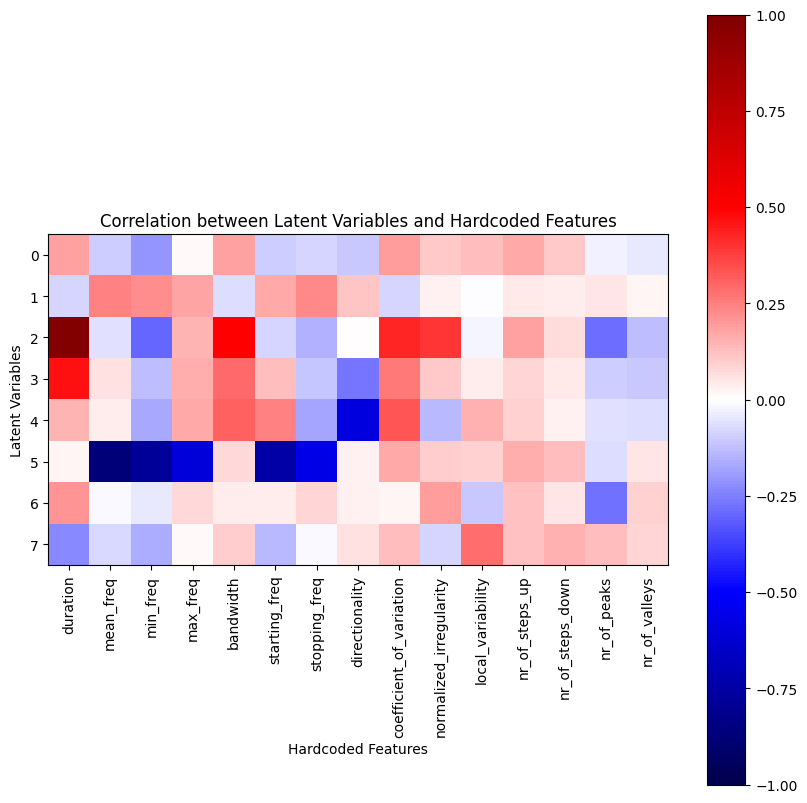

In [18]:
model = VAE_model
import features_single
from scipy.stats import spearmanr

test_specs = []

for i in spec_indices_test:
    test_specs.append(spec[i])

#create padding for the spectograms
padding_length = 160
test_padded_specs = np.zeros((len(test_specs), np.size(test_specs[0], 0), padding_length), dtype=np.float32)
for i in range(len(test_specs)):
    current_length = np.size(test_specs[i],1)
    zero_padding_length = padding_length - current_length

    zero_padded_spec = np.zeros((np.size(test_specs[i],0), padding_length))
    start_index = int((padding_length - current_length) // 2)
    zero_padded_spec[:, start_index:start_index+current_length] = test_specs[i]
    test_padded_specs[i] = zero_padded_spec

#delete spec, train_specs, test_specs from memory
del test_specs

#normalize the spectograms
test_padded_specs = np.log(test_padded_specs + 1e-10)  # Adding a small value to avoid log(0)
for i in range(test_padded_specs.shape[0]):
    test_padded_specs[i] = test_padded_specs[i] / np.max(test_padded_specs[i])

#convert to torch tensors
latent_test_loader = torch.utils.data.DataLoader(test_padded_specs, batch_size=1, shuffle=False)

#delete the padded spectograms from memory
del test_padded_specs

test_latent = model.get_latent(latent_test_loader)
print("Latent shape: ", test_latent.shape)

#get the hardcoded features of the test set
features =[]

for i in spec_indices_test:
    usv_features = features_single.get_usv_features(spec[i])
    features.append(usv_features.get())
features = np.array(features).squeeze()
print("Features shape: ", features.shape)
del spec

hardcoded_feature1 = 'duration'
hardcoded_feature2 = 'mean_freq'
hardcoded_feature3 = 'min_freq'
hardcoded_feature4 = 'max_freq'
hardcoded_feature5 = 'bandwidth'
hardcoded_feature6 = 'starting_freq'
hardcoded_feature7 = 'stopping_freq'
hardcoded_feature8 = 'directionality'
hardcoded_feature9 = 'coefficient_of_variation'
hardcoded_feature10 = 'normalized_irregularity'
hardcoded_feature11 = 'local_variability'
hardcoded_feature12 = 'nr_of_steps_up'
hardcoded_feature13 = 'nr_of_steps_down'
hardcoded_feature14 = 'nr_of_peaks'
hardcoded_feature15 = 'nr_of_valleys'

spearmanr_matrix, _ = spearmanr(features, test_latent)
n_features = features.shape[1]
n_latent = test_latent.shape[1]
correlation_matrix2 = spearmanr_matrix[:n_features, n_features:]
# correlation_matrix = spearmanr_matrix
correlation_matrix2 = correlation_matrix2.T

plt.figure(figsize=(10,10))
plt.imshow(correlation_matrix2, cmap='seismic')
plt.colorbar()
#scale colorbar between -1 and 1
plt.clim(-1, 1)
plt.ylabel('Latent Variables')
plt.xlabel('Hardcoded Features')
plt.title('Correlation between Latent Variables and Hardcoded Features')
plt.xticks(range(15), [hardcoded_feature1, hardcoded_feature2, hardcoded_feature3, hardcoded_feature4, hardcoded_feature5, hardcoded_feature6, hardcoded_feature7, hardcoded_feature8, hardcoded_feature9, hardcoded_feature10, hardcoded_feature11, hardcoded_feature12,hardcoded_feature13, hardcoded_feature14, hardcoded_feature15], rotation=90)
plt.show()

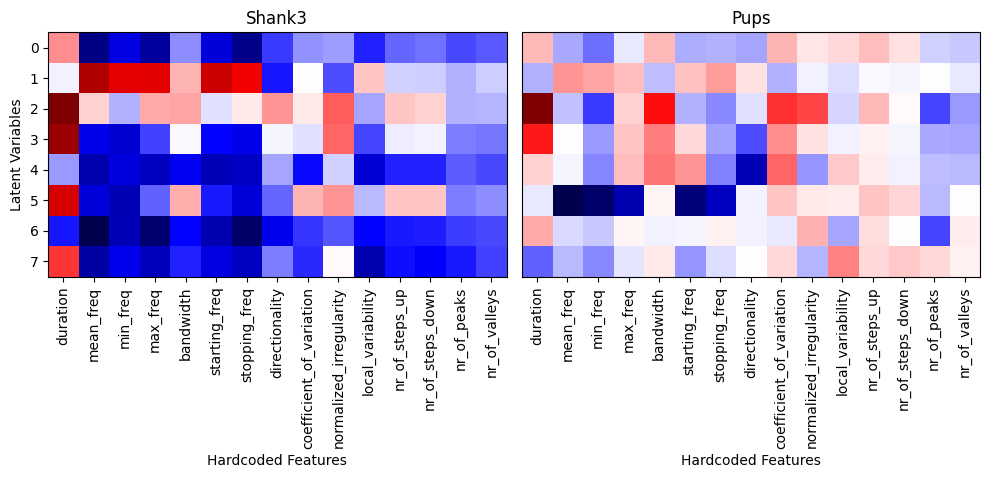

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(correlation_matrix, cmap='seismic')
plt.title('Shank3')
plt.ylabel('Latent Variables')
plt.xlabel('Hardcoded Features')
plt.xticks(range(15), [hardcoded_feature1, hardcoded_feature2, hardcoded_feature3, hardcoded_feature4, hardcoded_feature5, hardcoded_feature6, hardcoded_feature7, hardcoded_feature8, hardcoded_feature9, hardcoded_feature10, hardcoded_feature11, hardcoded_feature12,hardcoded_feature13, hardcoded_feature14, hardcoded_feature15], rotation=90)
plt.subplot(1,2,2)
plt.imshow(correlation_matrix2, cmap='seismic')
plt.title('Pups')
#remove yticks
plt.yticks([])
plt.xlabel('Hardcoded Features')
plt.xticks(range(15), [hardcoded_feature1, hardcoded_feature2, hardcoded_feature3, hardcoded_feature4, hardcoded_feature5, hardcoded_feature6, hardcoded_feature7, hardcoded_feature8, hardcoded_feature9, hardcoded_feature10, hardcoded_feature11, hardcoded_feature12,hardcoded_feature13, hardcoded_feature14, hardcoded_feature15], rotation=90)
plt.tight_layout()
plt.show()

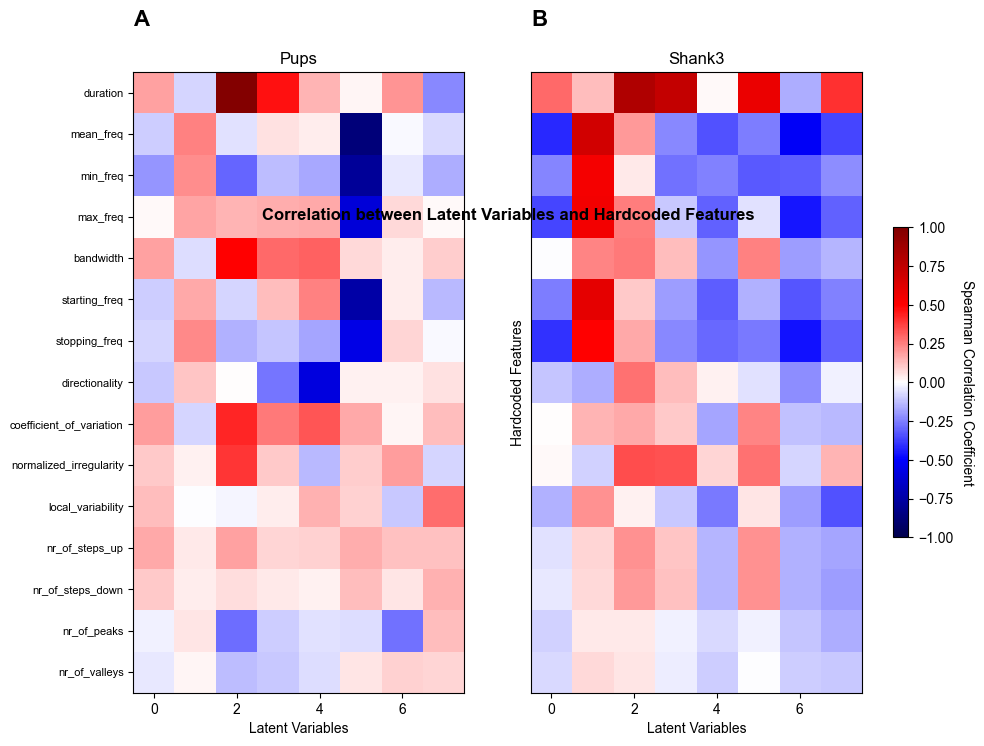

In [20]:
# Set the global font to Arial
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(10,10))
#set title for the entire figure
plt.suptitle('Correlation between Latent Variables and Hardcoded Features', fontweight='bold')
plt.subplots_adjust(top=1.5)
vmin = -1
vmax = 1
plt.subplot(1,2,2)
#Add label a to the top left of the plot
plt.text(0.05, 1.1, 'B', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
plt.imshow(correlation_matrix.T, cmap='seismic', vmin=vmin, vmax=vmax)
plt.title('Shank3')
plt.xlabel('Latent Variables')
plt.ylabel('Hardcoded Features')
plt.yticks([])
plt.subplot(1,2,1)
#Add label b to the top left of the plot
plt.text(0.05, 1.1, 'A', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
plt.imshow(correlation_matrix2.T, cmap='seismic',  vmin=vmin, vmax=vmax)
plt.title('Pups')
#remove yticks
plt.yticks(range(15), [hardcoded_feature1, hardcoded_feature2, hardcoded_feature3, hardcoded_feature4, hardcoded_feature5, hardcoded_feature6, hardcoded_feature7, hardcoded_feature8, hardcoded_feature9, hardcoded_feature10, hardcoded_feature11, hardcoded_feature12,hardcoded_feature13, hardcoded_feature14, hardcoded_feature15],fontsize = 8, rotation=0)
# plt.ylabel('Hardcoded Features')
plt.xlabel('Latent Variables')
# plt.xticks(range(15), [hardcoded_feature1, hardcoded_feature2, hardcoded_feature3, hardcoded_feature4, hardcoded_feature5, hardcoded_feature6, hardcoded_feature7, hardcoded_feature8, hardcoded_feature9, hardcoded_feature10, hardcoded_feature11, hardcoded_feature12,hardcoded_feature13, hardcoded_feature14, hardcoded_feature15], rotation=90)
#add colorbar for both plots to the right of the plots
# plt.subplot(1,3,3)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=vmin, vmax=vmax)), ax=plt.gcf().get_axes(), orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Spearman Correlation Coefficient', rotation=270, labelpad=15)
# plt.tight_layout()
plt.show()

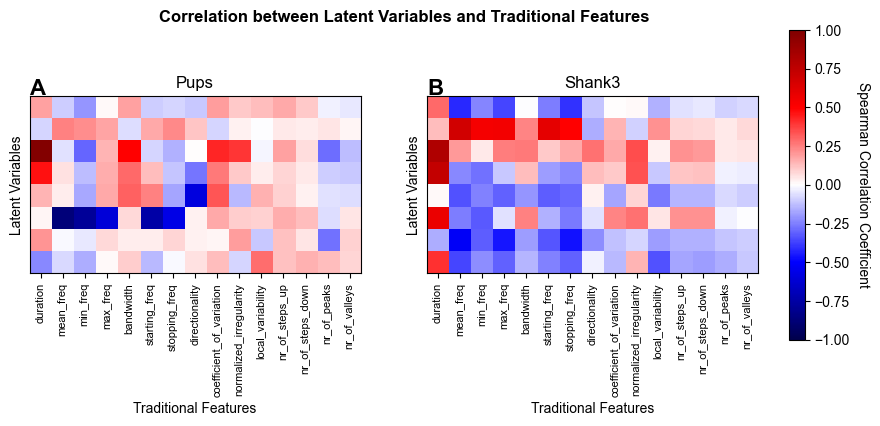

In [21]:
# Set the global font to Arial
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(10,10))
#set title for the entire figure
plt.suptitle('Correlation between Latent Variables and Traditional Features', fontweight='bold')
plt.subplots_adjust(top=1.5)
vmin = -1
vmax = 1

# --- Subplot B (Shank3) ---
plt.subplot(1,2,2)
#Add label B to the top left of the plot
plt.text(0.05, 1.1, 'B', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
# Removed .T to swap axes
plt.imshow(correlation_matrix, cmap='seismic', vmin=vmin, vmax=vmax)
plt.title('Shank3')
# Swapped labels
plt.xlabel('Traditional Features') # Now on X-axis
plt.ylabel('Latent Variables') # Now on Y-axis
# ADDED XTICKS HERE to match Subplot A
plt.xticks(range(15), [hardcoded_feature1, hardcoded_feature2, hardcoded_feature3, hardcoded_feature4, hardcoded_feature5, hardcoded_feature6, hardcoded_feature7, hardcoded_feature8, hardcoded_feature9, hardcoded_feature10, hardcoded_feature11, hardcoded_feature12,hardcoded_feature13, hardcoded_feature14, hardcoded_feature15],fontsize = 8, rotation=90)
# Remove yticks as they are not labeled
plt.yticks([])


# --- Subplot A (Pups) ---
plt.subplot(1,2,1)
#Add label A to the top left of the plot
plt.text(0.05, 1.1, 'A', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
# Removed .T to swap axes
plt.imshow(correlation_matrix2, cmap='seismic', vmin=vmin, vmax=vmax)
plt.title('Pups')

# The hardcoded features were on y-axis, now they should be on x-axis
plt.xticks(range(15), [hardcoded_feature1, hardcoded_feature2, hardcoded_feature3, hardcoded_feature4, hardcoded_feature5, hardcoded_feature6, hardcoded_feature7, hardcoded_feature8, hardcoded_feature9, hardcoded_feature10, hardcoded_feature11, hardcoded_feature12,hardcoded_feature13, hardcoded_feature14, hardcoded_feature15],fontsize = 8, rotation=90)
# Latent variables are now on the Y-axis
plt.ylabel('Latent Variables')
# Hardcoded features are now on the X-axis
plt.xlabel('Traditional Features')
# Remove yticks as they are not labeled
plt.yticks([])


#add colorbar for both plots to the right of the plots
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=vmin, vmax=vmax)), ax=plt.gcf().get_axes(), orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Spearman Correlation Coefficient', rotation=270, labelpad=15)
# plt.tight_layout() # might still be useful
plt.show()